In [1]:
import numpy as np
import random

# Environment parameters
n_states = 16  # 4x4 grid world
n_actions = 4  # Up, Down, Left, Right
goal_state = 15  # Target state

# Q-learning parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Exploration rate
n_episodes = 1000  # Number of episodes

# Initialize Q-table
Q = np.zeros((n_states, n_actions))

# Define the reward function
def reward_function(state):
    if state == goal_state:
        return 10  # Reward for reaching the goal
    return -1  # Penalty for each step

# Define the transition function
def get_next_state(state, action):
    row, col = divmod(state, 4)
    if action == 0:  # Up
        row = max(row - 1, 0)
    elif action == 1:  # Down
        row = min(row + 1, 3)
    elif action == 2:  # Left
        col = max(col - 1, 0)
    elif action == 3:  # Right
        col = min(col + 1, 3)
    return row * 4 + col

# Q-learning algorithm
for episode in range(n_episodes):
    state = random.randint(0, n_states - 1)
    
    while state != goal_state:
        if random.uniform(0, 1) < epsilon:
            action = random.randint(0, n_actions - 1)  # Explore
        else:
            action = np.argmax(Q[state])  # Exploit
        
        next_state = get_next_state(state, action)
        reward = reward_function(next_state)
        
        # Update Q-table
        best_next_action = np.argmax(Q[next_state])
        Q[state, action] += alpha * (reward + gamma * Q[next_state, best_next_action] - Q[state, action])
        
        state = next_state

print("Trained Q-table:")
print(Q)

# Policy derived from Q-table
policy = np.argmax(Q, axis=1)
print("Derived Policy:")
print(policy.reshape(4, 4))


Trained Q-table:
[[-1.00632965  1.70856339 -1.30520935 -1.31204155]
 [-0.72750314  3.11758694 -0.95248091 -0.51347508]
 [ 0.06050019  4.57268368 -0.62409188 -0.03557397]
 [ 0.16328739  6.19704719  0.02889068  0.62465613]
 [-0.95102283  0.32407362 -0.4462663   3.1216879 ]
 [-0.09958968  1.00166908 -0.57413252  4.58      ]
 [ 1.76985465  1.40516606  0.60405087  6.2       ]
 [ 3.21387009  8.          3.72546758  4.58411217]
 [-0.01183106  0.56751793 -0.30160246  4.55822589]
 [ 0.41217329  2.42519746 -0.12305656  6.19997778]
 [ 1.09551773  3.93233049  1.65558541  8.        ]
 [ 5.87693273 10.          4.34377647  6.66582546]
 [ 0.1977716   0.26733729 -0.4900995   6.19299573]
 [ 0.70419453  0.44074751  0.98174129  7.9999936 ]
 [ 1.60600135  1.43804309  2.07036033 10.        ]
 [ 0.          0.          0.          0.        ]]
Derived Policy:
[[1 1 1 1]
 [3 3 3 1]
 [3 3 3 1]
 [3 3 3 0]]


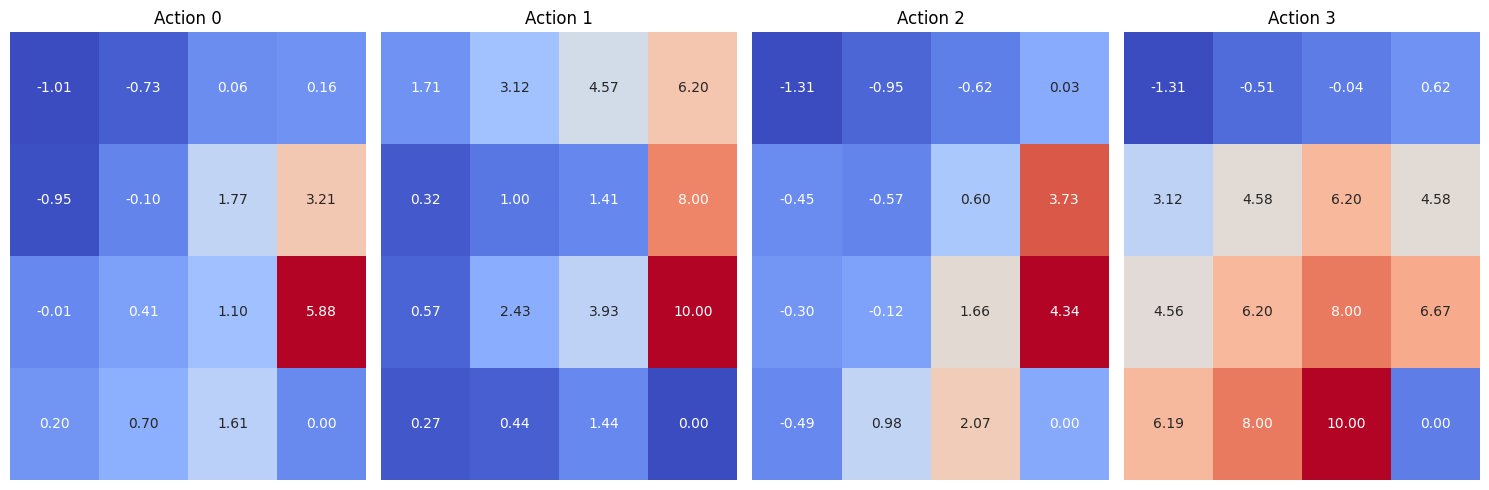

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_q_values(Q):
    fig, axes = plt.subplots(1, n_actions, figsize=(15, 5), sharey=True)
    for action in range(n_actions):
        ax = axes[action]
        q_values = Q[:, action].reshape(4, 4)
        sns.heatmap(q_values, annot=True, fmt=".2f", cmap='coolwarm', cbar=False, ax=ax)
        ax.set_title(f'Action {action}')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.tight_layout()
    plt.show()

plot_q_values(Q)


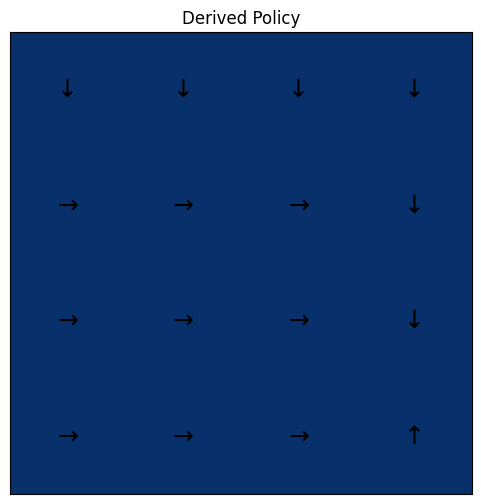

In [3]:
def plot_policy(policy):
    action_symbols = ['↑', '↓', '←', '→']  # Up, Down, Left, Right
    policy_grid = np.array([action_symbols[action] for action in policy]).reshape(4, 4)
    
    fig, ax = plt.subplots(figsize=(6, 6))
    cax = ax.matshow(np.ones((4, 4)), cmap='Blues', vmin=0, vmax=1)
    for (i, j), val in np.ndenumerate(policy_grid):
        ax.text(j, i, val, ha='center', va='center', fontsize=18, color='black')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.title('Derived Policy')
    plt.show()

plot_policy(policy)


In [8]:
def plot_path(path):
    grid_size = 4
    path_grid = np.zeros((grid_size, grid_size))
    
    for state in path:
        row, col = divmod(state, grid_size)
        path_grid[row, col] = 1
    
    fig, ax = plt.subplots(figsize=(6, 6))
    cax = ax.matshow(path_grid, cmap='Greens', vmin=0, vmax=1)
    for i in range(grid_size):
        for j in range(grid_size):
            if path_grid[i, j] == 1:
                ax.text(j, i, '•', ha='center', va='center', fontsize=20, color='red')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.title('Path Taken by the Agent')
    plt.show()

# For demonstration, let's simulate a path
def simulate_path(start_state):
    path = []
    state = start_state
    while state != goal_state:
        path.append(state)
        action = np.argmax(Q[state])  # Best action based on learned Q-values
        state = get_next_state(state, action)
    path.append(goal_state)  # Append the goal state
    return path

start_state = 0  # Start from the top-left corner
path = simulate_path(start_state)
plot_path(path)



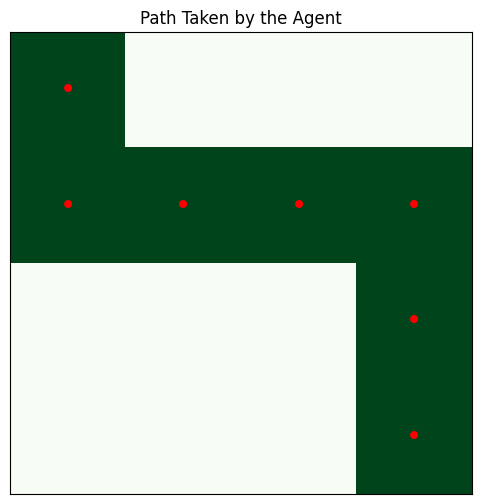

Training complete.
Q-table:
[[ 72.305659    65.35764801  72.75348013  81.        ]
 [ 80.88367045  72.54186273  72.73100482  90.        ]
 [ 89.7103332   79.82919358  80.3428517  100.        ]
 [  0.           0.           0.           0.        ]
 [ 72.9         58.09299119  65.19229134  72.71277286]
 [ 80.99977347  53.50044393  60.32927378  70.22117555]
 [ 89.86637551  22.96501608  53.01057451 -96.56631618]
 [  0.           0.           0.           0.        ]
 [ 65.61        57.38379708  58.89815862  64.62902468]
 [ 72.71321205  50.67835643  37.1200284   27.35232302]
 [ 58.64374669   8.39225585  21.80988035   0.83831186]
 [-61.2579511    0.26569765   4.74771292   0.        ]]


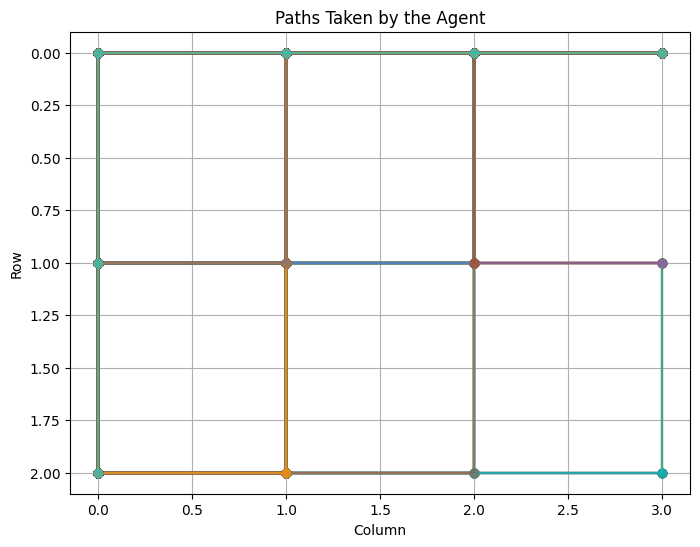

In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define constants
N_STATES = 12  # Number of states (3x4 grid)
N_ACTIONS = 4  # Number of actions (Up, Down, Left, Right)
EPISODES = 1000
ALPHA = 0.1
GAMMA = 0.9
EPSILON = 1.0
EPSILON_DECAY = 0.995
MIN_EPSILON = 0.01

# Rewards setup
REWARDS = np.zeros(N_STATES)
REWARDS[3] = 100  # Goal state (s4)
REWARDS[7] = -100  # Danger state (s8)

# Initialize Q-table
Q = np.zeros((N_STATES, N_ACTIONS))

# Define state transitions
def get_next_state(state, action):
    row, col = divmod(state, 4)
    if action == 0:  # Up
        row -= 1
    elif action == 1:  # Down
        row += 1
    elif action == 2:  # Left
        col -= 1
    elif action == 3:  # Right
        col += 1
    new_state = row * 4 + col
    if 0 <= row < 3 and 0 <= col < 4:
        return new_state
    return state  # Stay in place if out of bounds

# Initialize a list to store the paths
paths = []

# Training loop
for episode in range(EPISODES):
    state = 8  # Starting state (s9)
    done = False
    path = [state]  # Initialize path with the starting state
    
    while not done:
        # Choose action (epsilon-greedy)
        if random.uniform(0, 1) < EPSILON:
            action = random.randint(0, N_ACTIONS - 1)  # Exploration
        else:
            action = np.argmax(Q[state])  # Exploitation

        # Take action
        next_state = get_next_state(state, action)
        reward = REWARDS[next_state]

        # Update Q-table
        best_next_action = np.argmax(Q[next_state])
        Q[state, action] += ALPHA * (reward + GAMMA * Q[next_state, best_next_action] - Q[state, action])

        # Update state and path
        state = next_state
        path.append(state)

        # Check if the episode is done
        if state == 3 or state == 7:  # Goal or Danger state
            done = True

    # Store the path of this episode
    paths.append(path)

    # Decay epsilon
    EPSILON = max(MIN_EPSILON, EPSILON * EPSILON_DECAY)

print("Training complete.")
print("Q-table:")
print(Q)

# Define a function to plot the paths
def plot_paths(paths):
    plt.figure(figsize=(8, 6))
    for path in paths:
        x = [p % 4 for p in path]
        y = [p // 4 for p in path]
        plt.plot(x, y, marker='o', linestyle='-', alpha=0.5)
    
    plt.xlabel('Column')
    plt.ylabel('Row')
    plt.title('Paths Taken by the Agent')
    plt.grid(True)
    plt.gca().invert_yaxis()  # Invert Y-axis to match the grid layout
    plt.show()

# Plot the paths after training
plot_paths(paths)


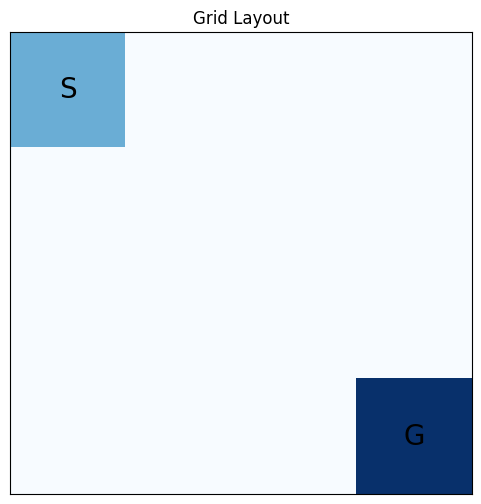

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plot_grid(start_state, goal_state):
    grid_size = 4
    grid = np.zeros((grid_size, grid_size))
    
    start_row, start_col = divmod(start_state, grid_size)
    goal_row, goal_col = divmod(goal_state, grid_size)
    
    grid[start_row, start_col] = 1  # Mark the start state
    grid[goal_row, goal_col] = 2    # Mark the goal state
    
    fig, ax = plt.subplots(figsize=(6, 6))
    cax = ax.matshow(grid, cmap='Blues', vmin=0, vmax=2)
    
    # Add text annotations
    for i in range(grid_size):
        for j in range(grid_size):
            if grid[i, j] == 1:
                ax.text(j, i, 'S', ha='center', va='center', fontsize=20, color='black')
            elif grid[i, j] == 2:
                ax.text(j, i, 'G', ha='center', va='center', fontsize=20, color='black')
    
    ax.set_xticks([])
    ax.set_yticks([])
    plt.title('Grid Layout')
    plt.show()

plot_grid(start_state=0, goal_state=15)
